# Vérification du codage du gradient de vitesse et de la vorticite

In [1]:
from trustutils import run 
from trustutils import visit
from trustutils.jupyter import plot
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

run.introduction("C. Reiss","16/03/2022")
run.description(r'Reprise d\'un vieux cas de valid k-eps pour k-tau et k-omega. On verifie qu\'on obtient une forme similaire de termes sources. Description du vieux cas : The present verification report aims at checking the post-processing of the convective, diffusive and source terms of the $k-\epsilon$ transport equations for the standard and realizable models, and for VDF and VEF discretizations. No numerical resolution is performed.')

run.description(r'\textbf{Initial conditions}. Periodic velocity, turbulent kinetic energy and turbulent dissipation fields defined by the following analytical expressions: \begin{equation*}\left\{\begin{array}{ll}\text{velocity vector: } & \textbf{u}(x,y,z) = \displaystyle{ \begin{pmatrix} -2 \cos(2\pi x) \sin(2\pi y) \sin(2\pi z) \\\\ \sin(2\pi x) \cos(2\pi y) \sin(2\pi z) \\\\ \sin(2\pi x) \sin(2\pi y) \cos(2\pi z) \end{pmatrix}} \\\\ \text{turbulent kinetic energy: } & k(x,y,z) = \cos(2 \pi y)+2 \\\\ \text{turbulent dissipation rate: } & \varepsilon(x,y,z) = \sin(2 \pi y)+2 \\\\ \text{turbulent dissipation time scale: } & \tau(x,y,z) = \frac{\cos(2 \pi y)+2}{\sin(2 \pi y)+2} \\\\ \text{turbulent dissipation rate: } & \omega(x,y,z) = \frac{\sin(2 \pi y)+2}{\cos(2 \pi y)+2} \end{array}\right.\end{equation*}')

run.TRUST_parameters()

## Introduction 
 Validation made by : C. Reiss



 Report created : 16/03/2022



 Report generated 24/03/2022

### Description 
Reprise d\'un vieux cas de valid k-eps pour k-tau et k-omega. On verifie qu\'on obtient une forme similaire de termes sources. Description du vieux cas : The present verification report aims at checking the post-processing of the convective, diffusive and source terms of the $k-\epsilon$ transport equations for the standard and realizable models, and for VDF and VEF discretizations. No numerical resolution is performed.

### Description 
\textbf{Initial conditions}. Periodic velocity, turbulent kinetic energy and turbulent dissipation fields defined by the following analytical expressions: \begin{equation*}\left\{\begin{array}{ll}\text{velocity vector: } & \textbf{u}(x,y,z) = \displaystyle{ \begin{pmatrix} -2 \cos(2\pi x) \sin(2\pi y) \sin(2\pi z) \\\\ \sin(2\pi x) \cos(2\pi y) \sin(2\pi z) \\\\ \sin(2\pi x) \sin(2\pi y) \cos(2\pi z) \end{pmatrix}} \\\\ \text{turbulent kinetic energy: } & k(x,y,z) = \cos(2 \pi y)+2 \\\\ \text{turbulent dissipation rate: } & \varepsilon(x,y,z) = \sin(2 \pi y)+2 \\\\ \text{turbulent dissipation time scale: } & \tau(x,y,z) = \frac{\cos(2 \pi y)+2}{\sin(2 \pi y)+2} \\\\ \text{turbulent dissipation rate: } & \omega(x,y,z) = \frac{\sin(2 \pi y)+2}{\cos(2 \pi y)+2} \end{array}\right.\end{equation*}

### TRUST parameters 
 * Version TRUST: 1.8.5_beta
 * Binary used: /export/home/catA/es243900/projects/devElie/TRUST-elie/exec/TRUST_mpi_opt (built on TRUST /export/home/catA/es243900/projects/devElie/TRUST-elie/Validation/Rapports_automatiques/Verification/CoviMAC/grad_rot/build)

In [2]:
from trustutils import run 

c1 = run.addCase(".","grad_rot.data", nbProcs=4)

run.printCases()
run.runCases()

### Test cases 
* ./grad_rot.data : 


Running ...
  => A total of 1 cases were (successfully) run in 22.3s.


## Calcul de la vitesse et verification

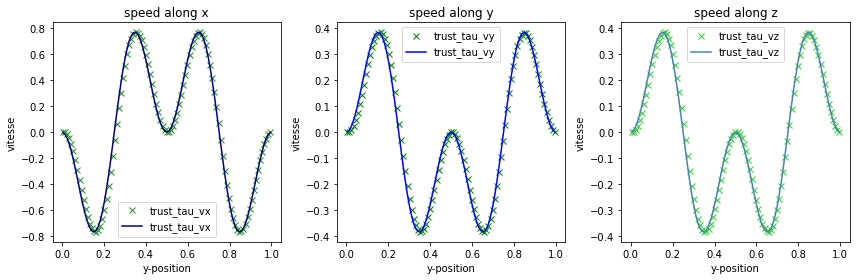

In [3]:
x = np.linspace(0.005,0.995, 101)
y = np.linspace(0.005,0.995, 101)
z = np.linspace(0.005,0.995, 101)

vx_ana = -2*np.cos(2*3.14*x)*np.sin(2*3.14*y)*np.sin(2*3.14*z)
vy_ana = np.sin(2*3.14*x)*np.cos(2*3.14*y)*np.sin(2*3.14*z) 
vz_ana = np.sin(2*3.14*x)*np.sin(2*3.14*y)*np.cos(2*3.14*z) 

vx= plot.loadText("grad_rot_VITESSEX.son")
vy= plot.loadText("grad_rot_VITESSEY.son")
vz= plot.loadText("grad_rot_VITESSEZ.son")

fig = plt.figure(figsize=(12,4))

plt.title("Verification of initial conditions")

plt.subplot(131)
plt.plot(y, vx, 'x', label = 'trust_tau_vx', color = "forestgreen")
plt.plot(y, vx_ana, '-', label = 'trust_tau_vx', color = "navy")
plt.xlabel('y-position')
plt.ylabel('vitesse')
plt.title("speed along x")
plt.legend()

plt.subplot(132)
plt.plot(y, vy, 'x', label = 'trust_tau_vy', color = "green")
plt.plot(y, vy_ana, '-', label = 'trust_tau_vy', color = "blue")
plt.xlabel('y-position')
plt.ylabel('vitesse')
plt.title("speed along y")
plt.legend()

plt.subplot(133)
plt.plot(y, vz, 'x', label = 'trust_tau_vz', color = "limegreen")
plt.plot(y, vz_ana, '-', label = 'trust_tau_vz', color = "steelblue")
plt.xlabel('y-position')
plt.ylabel('vitesse')
plt.title("speed along z")
plt.legend()


plt.tight_layout()

plt.show()


## Calcul du gradient et verification

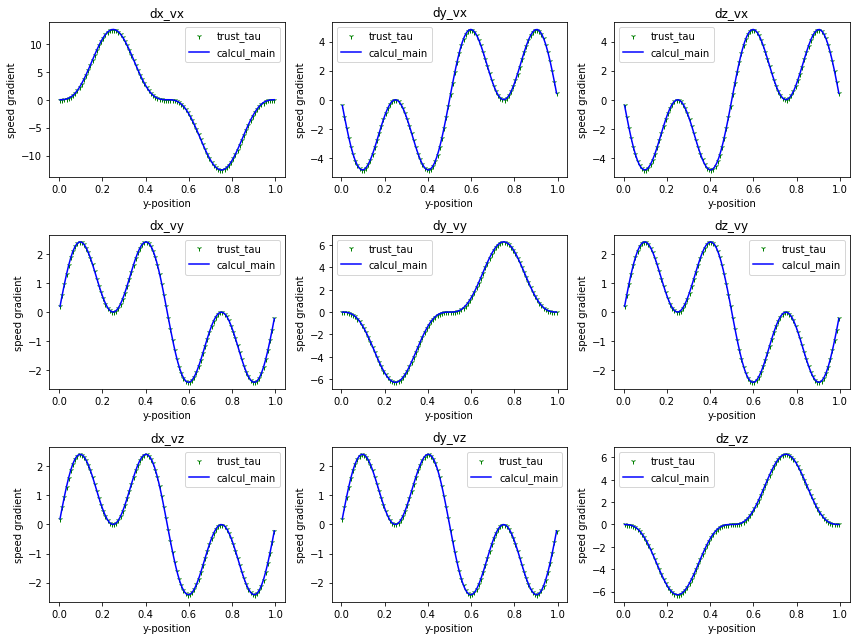

In [4]:
g=plot.loadText("grad_rot_GRAD_V.son")

y2 = np.linspace(0.005, 0.995, 100)

dx_vx_ana = 2*2*3.14*np.sin(2*3.14*x)*np.sin(2*3.14*y)*np.sin(2*3.14*z)
dy_vx_ana = -2*np.cos(2*3.14*x)*2*3.14*np.cos(2*3.14*y)*np.sin(2*3.14*z)
dz_vx_ana = -2*np.cos(2*3.14*x)*np.sin(2*3.14*y)*2*3.14*np.cos(2*3.14*z)
dx_vy_ana = 2*3.14*np.cos(2*3.14*x)*np.cos(2*3.14*y)*np.sin(2*3.14*z) 
dy_vy_ana = np.sin(2*3.14*x)*2*3.14*-np.sin(2*3.14*y)*np.sin(2*3.14*z) 
dz_vy_ana = np.sin(2*3.14*x)*np.cos(2*3.14*y)*2*3.14*np.cos(2*3.14*z) 
dx_vz_ana = 2*3.14*np.cos(2*3.14*x)*np.sin(2*3.14*y)*np.cos(2*3.14*z) 
dy_vz_ana = np.sin(2*3.14*x)*2*3.14*np.cos(2*3.14*y)*np.cos(2*3.14*z) 
dz_vz_ana = np.sin(2*3.14*x)*np.sin(2*3.14*y)*2*3.14*-np.sin(2*3.14*z) 

dx_vx = np.array(g[1::9])
dy_vx = np.array(g[2::9])
dz_vx = np.array(g[3::9])
dx_vy = np.array(g[4::9])
dy_vy = np.array(g[5::9])
dz_vy = np.array(g[6::9])
dx_vz = np.array(g[7::9])
dy_vz = np.array(g[8::9])
dz_vz = np.array(g[9::9])

fig = plt.figure(figsize=(12,9))

plt.subplot(331)
plt.plot(y2, dx_vx, '1', label = 'trust_tau', color = "green")
plt.plot(y, dx_vx_ana, '-b', label = 'calcul_main')
plt.xlabel('y-position')
plt.ylabel('speed gradient')
plt.title('dx_vx')
plt.legend()

plt.subplot(332)
plt.plot(y2, dy_vx, '1', label = 'trust_tau', color = "green")
plt.plot(y, dy_vx_ana, '-b', label = 'calcul_main')
plt.xlabel('y-position')
plt.ylabel('speed gradient')
plt.title('dy_vx')
plt.legend()

plt.subplot(333)
plt.plot(y2, dz_vx, '1', label = 'trust_tau', color = "green")
plt.plot(y, dz_vx_ana, '-b', label = 'calcul_main')
plt.xlabel('y-position')
plt.ylabel('speed gradient')
plt.title('dz_vx')
plt.legend()

plt.subplot(334)
plt.plot(y2, dx_vy, '1', label = 'trust_tau', color = "green")
plt.plot(y, dx_vy_ana, '-b', label = 'calcul_main')
plt.xlabel('y-position')
plt.ylabel('speed gradient')
plt.title('dx_vy')
plt.legend()

plt.subplot(335)
plt.plot(y2, dy_vy, '1', label = 'trust_tau', color = "green")
plt.plot(y, dy_vy_ana, '-b', label = 'calcul_main')
plt.xlabel('y-position')
plt.ylabel('speed gradient')
plt.title('dy_vy')
plt.legend()

plt.subplot(336)
plt.plot(y2, dz_vy, '1', label = 'trust_tau', color = "green")
plt.plot(y, dz_vy_ana, '-b', label = 'calcul_main')
plt.xlabel('y-position')
plt.ylabel('speed gradient')
plt.title('dz_vy')
plt.legend()

plt.subplot(337)
plt.plot(y2, dx_vz, '1', label = 'trust_tau', color = "green")
plt.plot(y, dx_vz_ana, '-b', label = 'calcul_main')
plt.xlabel('y-position')
plt.ylabel('speed gradient')
plt.title('dx_vz')
plt.legend()

plt.subplot(338)
plt.plot(y2, dy_vz, '1', label = 'trust_tau', color = "green")
plt.plot(y, dy_vz_ana, '-b', label = 'calcul_main')
plt.xlabel('y-position')
plt.ylabel('speed gradient')
plt.title('dy_vz')
plt.legend()

plt.subplot(339)
plt.plot(y2, dz_vz, '1', label = 'trust_tau', color = "green")
plt.plot(y, dz_vz_ana, '-b', label = 'calcul_main')
plt.xlabel('y-position')
plt.ylabel('speed gradient')
plt.title('dz_vz')
plt.legend()


plt.tight_layout()


## Calcul de la vorticite et verification

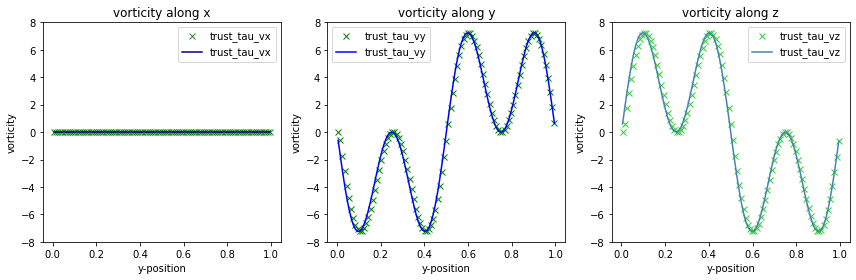

In [5]:
vort_x= plot.loadText("grad_rot_VORTICITEX.son")
vort_y= plot.loadText("grad_rot_VORTICITEY.son")
vort_z= plot.loadText("grad_rot_VORTICITEZ.son")

vort_x_ana = dy_vz_ana - dz_vy_ana
vort_y_ana = dz_vx_ana - dx_vz_ana
vort_z_ana = dx_vy_ana - dy_vx_ana

fig = plt.figure(figsize=(12,4))

plt.subplot(131)
plt.plot(y, vort_x, 'x', label = 'trust_tau_vx', color = "forestgreen")
plt.plot(y, vort_x_ana, '-', label = 'trust_tau_vx', color = "navy")
plt.xlabel('y-position')
plt.ylabel('vorticity')
plt.title("vorticity along x")
plt.ylim(-8,8)
plt.legend()

plt.subplot(132)
plt.plot(y, vort_y, 'x', label = 'trust_tau_vy', color = "green")
plt.plot(y, vort_y_ana, '-', label = 'trust_tau_vy', color = "blue")
plt.xlabel('y-position')
plt.ylabel('vorticity')
plt.title("vorticity along y")
plt.ylim(-8,8)
plt.legend()

plt.subplot(133)
plt.plot(y, vort_z, 'x', label = 'trust_tau_vz', color = "limegreen")
plt.plot(y, vort_z_ana, '-', label = 'trust_tau_vz', color = "steelblue")
plt.xlabel('y-position')
plt.ylabel('vorticity')
plt.title("vorticity along z")
plt.ylim(-8,8)
plt.legend()


plt.tight_layout()

plt.show()
